# Request html document from the webserver

In [25]:
# !pip install requests

In [2]:
import re
import requests
import nltk
from bs4 import BeautifulSoup

In [8]:
# download the lyrics
url = 'https://www.lyrics.com/artist/Michael-Jackson/4576'

In [9]:
response = requests.get(url)

In [10]:
# Check the status code
response.status_code

# 200: means that the request was valid and we got what we asked for
# 404: Page not found
# Everything with 400 means that we made a mistake or are not authorized
# Everything with 500 means that there is an error on the server side

200

In [11]:
# Where is the html
print(response.text[:40])


<!doctype html>
<!--[if lt IE 7]> <html


In [12]:
html = response.text

# How can we use the structure that the html document provides us to our advantage?

-> Parse html

In [13]:
# !pip install beautifulsoup4
from bs4 import BeautifulSoup

In [14]:
parsed_html = BeautifulSoup(html,'html.parser')

In [15]:
# print(parsed_html) 

In [16]:
# albums
albums = parsed_html.find_all('h3',{'class':'artist-album-label'})

for i in albums:
    print(i.text)

The Sound of the Musicals [2019] [2019]
The Ultimate Collection: 70s [2019]
100 Hits: The Best 80s Groove Album [2018]
60s Jukebox: The Ultimate Collection [2018]
A Motown Christmas [2018] [2018]
HIStory: Continues [2018]
Marek i Marek: Niedzwiecki Sierocki [2018]
Mexico City 1975 [2018]
RFM Disco Funk [2018] [2018]
Scorpion [2018]
Scorpion [2018]
Shaolin Soul Episodes 1, 2, 3 [2018]
Talents France Bleu 2018, Vol. 1 [2018]
The Broadcast Archives [2018]
Torcida 2018: Nacional e Internacional [2018]
'70s Schooldays: The Ultimate Collection [2017] [2017]
100 Hits: The Best Eighties Album [2017]
101 Kids Songs [2017]
101 No. 1 Hits [2017]
35 Years of Waking Up with Today [2017]
Classic Kids' Party [2017]
Despicable Me 3 [Original Motion Picture Soundtrack] [2017]
Latest & Greatest Pop Hits [2017]
New Year's Eve Countdown [2017]
Now That's What I Call Classic Soul [2017]
Road Trip: The Ultimate Collection [2017]
Scream [2017]
SmoothFM Countdown Favourites [2017]
So Fresh: Greatest Hits of t

In [17]:
# songs
songs = parsed_html.find_all('td',{'class':'tal qx'})

for i in songs:
    print(i.text)

ABC
Got to Be There
Can You Feel It
I Want You Back
Little Christmas Tree
Scream
They Don't Care About Us
Stranger in Moscow
This Time Around
Earth Song
D.S.
You Are Not Alone
Childhood [Theme from "Free Willy 2"]
Tabloid Junkie
2 Bad
History
Little Susie
Beat It
Happy
I Want You Back
Don’t Matter To Me [feat. Michael Jackson]
Don't Matter to Me
Don’t Matter to Me
Maybe Tomorrow
Wanna Be Startin' Somethin'
Scream
They Don't Care About Us
In the Closet
Wanna Be Startin' Somethin'
Stranger in Moscow
Smooth Criminal
You Are Not Alone
Billie Jean
Thriller
Beat It
Black or White
Earth Song
Heal the World
History
Human Nature
This Place Hotel
She's Out of My Life
Rock With You
Lovely One
Working Day and Night
I Just Can't Stop Loving You
Bad
It's Too Late to Change the Time
Happy
Rockin' Robin
Forever Came Today
Ben
One Day in Your Life
I Want You Back
ABC
Can You Feel It
I Want You Back
ABC
Rockin’ Robin
One Day in Your Life
Billie Jean
ABC
Bad
I Want You Back
I Want You Back
I Want You Bac

In [18]:
# time
# songs
time = parsed_html.find_all('td',{'class':'tar qx'})

for i in time:
    print(i.text)

 
 
 
 
3:33
 
 
 
 
 
 
 
 
 
 
 
 
 
4:28
 
4:06
4:05
4:06
 
3:19
2:33
2:48
1:24
5:45
4:57
5:58
6:17
8:01
6:33
6:58
4:11
6:18
8:20
4:45
4:27
5:20
4:19
4:01
5:59
7:14
6:35
6:36
2:39
4:28
2:08
5:26
3:01
4:30
2:58
 
3:33
3:00
2:59
2:34
4:17
 
2:58
4:07
 
2:59
2:57
2:56
 
5:44
5:44
5:58
4:14
3:58
4:53
4:40
4:37
7:00
6:26
4:07
4:19
5:13
3:38
3:38
3:38
4:53
5:59
 
2:55
3:08
 
3:58
 
2:58
3:31
2:51
1:25
6:28
4:19
1:24
9:05
6:10
5:45
4:03
8:51
7:42
3:37
 
5:45
4:27
5:20
4:19
4:01
5:59
7:14
6:25
6:09
4:15
6:35
6:36
 
3:40
3:42
3:41
3:41
3:54
3:33
3:45
5:51
4:07
4:15
4:18
 
2:59
4:00
3:59
3:56
3:19
3:44
2:51
3:42
2:18
3:34
4:15
4:58
3:59
5:06
3:33
3:05
2:44
5:57
3:27
2:58
4:17
3:43
2:32
3:20
2:47
3:54
4:55
3:53
3:56
4:26
3:26
3:27
 
5:20
4:51
3:56
4:05
3:16
5:35
4:15
4:37
4:15
4:07
4:06
3:54
4:05
3:15
5:35
4:15
4:36
4:14
4:05
3:21
4:43
3:02
4:56
4:36
4:39
4:17
5:44
4:05
4:53
3:18
3:24
4:07
4:13
4:24
4:12
3:10
3:53
3:29
2:58
3:23
3:01
4:55
4:53
2:33
2:50
2:47
2:59
3:04
3:38
2:50
3:02
2:47
2:44


In [19]:
lyr = 'http://www.lyrics.com'

In [20]:
songs[0].a.get('href')

'/lyric/35948368/Michael+Jackson/ABC'

In [21]:
songs

[<td class="tal qx"><strong><a href="/lyric/35948368/Michael+Jackson/ABC">ABC</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/36062614/Michael+Jackson/Got+to+Be+There">Got to Be There</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/34909100/Michael+Jackson/Can+You+Feel+It">Can You Feel It</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/34982001/Michael+Jackson/I+Want+You+Back">I Want You Back</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/35491786/Michael+Jackson/Little+Christmas+Tree">Little Christmas Tree</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/35268026/Michael+Jackson/Scream">Scream</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/35268033/Michael+Jackson/They+Don%27t+Care+About+Us">They Don't Care About Us</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/35268032/Michael+Jackson/Stranger+in+Moscow">Stranger in Moscow</a></strong></td>,
 <td class="tal qx"><strong><a href=

In [22]:
for k in range(len(songs)):
    print(songs[k].a.get('href'))#查a标签的href值

/lyric/35948368/Michael+Jackson/ABC
/lyric/36062614/Michael+Jackson/Got+to+Be+There
/lyric/34909100/Michael+Jackson/Can+You+Feel+It
/lyric/34982001/Michael+Jackson/I+Want+You+Back
/lyric/35491786/Michael+Jackson/Little+Christmas+Tree
/lyric/35268026/Michael+Jackson/Scream
/lyric/35268033/Michael+Jackson/They+Don%27t+Care+About+Us
/lyric/35268032/Michael+Jackson/Stranger+in+Moscow
/lyric/35268031/Michael+Jackson/This+Time+Around
/lyric/35268030/Michael+Jackson/Earth+Song
/lyric/35268029/Michael+Jackson/D.S.
/lyric/35268020/Michael+Jackson/You+Are+Not+Alone
/lyric/35268025/Michael+Jackson/Childhood+%5BTheme+from+%22Free+Willy+2%22%5D
/lyric/35268024/Michael+Jackson/Tabloid+Junkie
/lyric/35268023/Michael+Jackson/2+Bad
/lyric/35268022/Michael+Jackson/History
/lyric/35268021/Michael+Jackson/Little+Susie
/lyric/35738067/Michael+Jackson/Beat+It
/lyric/35289698/Michael+Jackson/Happy
/lyric/35289850/Michael+Jackson/I+Want+You+Back
/lyric/35271824/Michael+Jackson/Don%E2%80%99t+Matter+To+Me+%5Bfe

/lyric/14049175/Michael+Jackson/Blame+It+On+the+Boogie
/lyric/18498846/Michael+Jackson/Carousel+%5BPreviously+Unreleased+Track%3B+Bonus+Track%5D
/lyric/9870228/Michael+Jackson/Black+or+White
/lyric/26974683/Michael+Jackson/Scream
/lyric/28777015/Michael+Jackson/You+Are+Not+Alone
/lyric/9870230/Michael+Jackson/Remember+the+Time
/lyric/37087848/Michael+Jackson/ABC
/lyric/5770290/Michael+Jackson/Give+in+to+Me
/lyric/7361810/Michael+Jackson/P.Y.T.+%28Pretty+Young+Thing%29+%5B2008+Version%5D
/lyric/7361802/Michael+Jackson/Sunset+Driver
/lyric/7361848/Michael+Jackson/She%27s+Out+of+My+Life
/lyric/9870200/Michael+Jackson/Rock+With+You+%5BAlbum+Version%5D
/lyric/3736432/Michael+Jackson/Here+I+Am+%28Come+and+Take+Me%29
/lyric/13771108/Michael+Jackson/The+Way+You+Make+Me+Feel
/lyric/22045144/Michael+Jackson/We%27re+Almost+There
/lyric/9846759/Michael+Jackson/Beat+It+%5BPreviously+Unreleased+Track%3B+Bonus+Track%5D
/lyric/31503460/Michael+Jackson/There+Must+Be+More+To+Life+Than+This
/lyric/322088

In [10]:
import pandas as pd
import re
import requests
import nltk
from bs4 import BeautifulSoup

def lookup():
    # artist = input("Who you lookin for duder? ")
    # url of artist
    # url = 'https://www.lyrics.com/artist/W.-Darling/2979499'
    # url = 'https://www.lyrics.com/artist/mac-mccaughan/179135'
    url = 'https://www.lyrics.com/artist/Haevn/3360449'
    
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    alb = []
    s = []
    ti = []
    
    albums = soup.find_all('h3', {'class': 'artist-album-label'})
    for i in albums:
        alb.append(i.text)
    
    songs = soup.find_all('td', {'class': 'tal qx'})
    for i in songs:
        s.append(i.text)
    
    time = soup.find_all('td',{'class':'tar qx'})
    for i in time:
        ti.append(i.text)
        
    base = 'https://www.lyrics.com/' # connect the extracted address
    l = []
    
    for i in range(len(songs)):
        if songs[i].a is None:
            pass
        else:
            lyr = base + songs[i].a.attrs['href']
            url = lyr
            r = requests.get(url)
            soup = BeautifulSoup(r.text, 'html.parser')
            l.append(soup.find('pre', {'id': 'lyric-body-text'}).text)
    df = pd.DataFrame({'song': s,'time': ti, 'lyrics': l})
    return df

In [19]:
lookup()

,song,time,lyrics
0,Back in the Water,3:10,"You're back in the rain, in over your head\nBa..."
1,Bright Lights,3:44,Your words are high and running through a tire...
2,Mind Games,3:04,[?] we're fading away\nLike footprints out in ...
3,Back in the Water,3:10,"You're back in the rain, in over your head\nBa..."
4,Where the Heart Is,3:53,High above the tallest tree\nCourage will come...
5,Finding Out More,3:23,Wonder if I\nShould tell you not to wait\nI'll...
6,Sinner Love,3:41,Somebody take me out of this hollow world\n'Ca...
7,Love Is a Game,4:24,Love is a game played safe\nLooks like you're ...
8,Fortitude,3:34,You hold it back from us\nNo need to hide no m...
9,Love Is a Game,4:24,Love is a game played safe\nLooks like you're ...


In [15]:
mac_mccaughan = lookup()

In [16]:
type(mac_mccaughan)

pandas.core.frame.DataFrame

In [17]:
mac_mccaughan

,song,time,lyrics
0,Your Hologram,3:20,Do you claim to drag your net through deep wat...
1,Box Batteries,3:15,We'll get your stepdad's car\nLet's take it ou...
2,Lost Again,3:51,All these houses are split in two\nI'm driving...
3,Wet Leaves,3:47,One foot on wet leaves\nOne foot on concrete\n...


In [34]:
# download and save the lyrics to seperate files
import os
import random

def get_lyrics():
    #url = 'https://www.lyrics.com/artist/W.-Darling/2979499'
    #url = 'https://www.lyrics.com/artist/mac-mccaughan/179135'
    #url = 'https://www.lyrics.com/artist/Haevn/3360449'
    #url = 'https://www.lyrics.com/artist/Michael-Jackson/4576'
    url = 'https://www.lyrics.com/artist/Taylor-Swift/816977'
    
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    alb = []
    s = []
    ti = []
    
    albums = soup.find_all('h3', {'class': 'artist-album-label'})
    for i in albums:
        alb.append(i.text)
    
    songs = soup.find_all('td', {'class': 'tal qx'})
    for i in songs:
        s.append(i.text)
    
    time = soup.find_all('td',{'class':'tar qx'})
    for i in time:
        ti.append(i.text)
        
    base = 'https://www.lyrics.com/' # connect the extracted address
    l = []         
        
    save_path = '/home/guo/download'
    
    # 根据singer创建一个文件夹,如果不存在就新建
    dir_path=save_path+'/'+ 'Taylor-Swift' 
    if not os.path.exists(dir_path):
              os.path.join(save_path,'Taylor-Swift') 
              os.mkdir(dir_path)
                
                
    for i in range(len(songs)):
        if songs[i].a is None:
            pass
        else:
            lyr = base + songs[i].a.attrs['href']
            url = lyr
            #r = requests.get(url,timeout = random.uniform(1, 3))
            r = requests.get(url)
            soup = BeautifulSoup(r.text, 'html.parser')
            try:
                lyrics = soup.find('pre', {'id': 'lyric-body-text'}).text           
                #将当前song，写入以song name命名的txt文件
                filename =  dir_path +'/'+ s[i] + '.txt'
                with open(filename, 'w') as file:
                            file.write(lyrics)                
            except AttributeError:
                try:
                    filename =  dir_path + s[i] + '.txt'
                    with open(filename, 'w') as file:
                            file.write(lyrics) 
                except AttributeError:
                    print('AttributeError, url is ', url)
                    pass
            except FileNotFoundError:
                try:
                    filename =  dir_path + s[i] + '.txt'
                    with open(filename, 'w') as file:
                            file.write(lyrics) 
                except FileNotFoundError:
                    print('FileNotFoundError, url is ', url)
                    pass

In [35]:
get_lyrics()

FileNotFoundError, url is  https://www.lyrics.com//lyric/24947294/Taylor+Swift/Back+to+December-Apologize-You%27re+Not+Sorry
FileNotFoundError, url is  https://www.lyrics.com//lyric/10049693/Taylor+Swift/Teardrops+on+My+Guitar+%5BNew+Mix-Radio+Edit%5D
FileNotFoundError, url is  https://www.lyrics.com//lyric/30831362/Taylor+Swift/Tim+McGraw+%5BInstrumental+w-+BG+vocals%5D
FileNotFoundError, url is  https://www.lyrics.com//lyric/30831361/Taylor+Swift/Picture+To+Burn+%5BInstrumental+w-+BG+vocals%5D
FileNotFoundError, url is  https://www.lyrics.com//lyric/30831360/Taylor+Swift/Teardrops+On+My+Guitar+%5BInstrumental+w-+BG+vocals%5D
FileNotFoundError, url is  https://www.lyrics.com//lyric/30831359/Taylor+Swift/A+Place+In+This+World+%5BInstrumental+w-+BG+vocals%5D
FileNotFoundError, url is  https://www.lyrics.com//lyric/30831358/Taylor+Swift/Cold+As+You+%5BInstrumental+w-+BG+vocals%5D
FileNotFoundError, url is  https://www.lyrics.com//lyric/30831357/Taylor+Swift/The+Outside+%5BInstrumental+w-

In [40]:
# merge txt files
def MergeTxt(filepath,outfile):
    '''
    merge many txt files in directory to one
    filepath = path of the files
    outfile = output file    
    '''
    k = open(filepath+outfile, 'a+')
    for parent, dirnames, filenames in os.walk(filepath):
        for filepath in filenames:
            txtPath = os.path.join(parent, filepath)  # txtpath就是所有文件夹的路径
            f = open(txtPath)
            ##########换行写入##################
            k.write(f.read()+";")
    k.close()
    print('Merge finished')

In [41]:
'''
# singer 1
filepath = '/home/guo/download/Taylor-Swift/'
outfile1 = 'lyrics_singer1.txt'
MergeTxt(filepath,outfile1)

# singer 2
filepath = '/home/guo/download/Michael-Jackson/'
outfile2 = 'lyrics_singer2.txt'
MergeTxt(filepath,outfile2)
'''

Merge finished


["I don't know what's going happen to you baby \nBut I do know that I want you \nYou walk around this town with your head all up in the sky \nAnd I do know that I want you \n\nLet's dance, let's shout \nShake you body down to the ground \nShake you body down to the ground \n\nYou tease me with your loving to play hard to get \nCause you do know that I love it \nYou walk around this town with your head all up in the sky \nAnd I do know that I want you \n\nLet's dance, let's shout \nShake you body down to the ground \nShake you body down to the ground \nShake you body down to the ground \nShake you body down to the ground \n\nYou are the spark that lit the fire inside of me \nAnd you know that I love it \nI need to do just something to get closer to your soul \nAnd you do know that I want to \n\nLet's dance, let's shout \nLet's dance, let's shout", "I don't know what's going happen to you baby \nBut I do know that I want you \nYou walk around this town with your head all up in the sky \n

In [3]:
# clean text
def clean_text(text):
    clean_text = text.replace('\n', ' ').strip()
    return clean_text

In [4]:
'''
# change the list in the file as strings in line
def lines_as_str(lyrics_lines):
    s_list = []
    for line in open(lyrics_lines):
        if line != '\n':
            n=0
            line = clean_text(line)
            s_list.append(line)
            n+=1  
    return s_list

# 以‘行‘为单位输入
string1 = lines_as_str(outfile1)  
string2 = lines_as_str(outfile2) 
'''

"\n# change the list in the file as strings in line\ndef lines_as_str(lyrics_lines):\n    s_list = []\n    for line in open(lyrics_lines):\n        if line != '\n':\n            n=0\n            line = clean_text(line)\n            s_list.append(line)\n            n+=1  \n    return s_list\n\n# 以‘行‘为单位输入\nstring1 = lines_as_str(outfile1)  \nstring2 = lines_as_str(outfile2) \n"

In [5]:
# use song as unit to feed model 
import os

def song_as_string(filepath):
    files = os.listdir(filepath)
    corpus = []
    i = 0
    for fn in files:
            # get filename名称的信息  
            filename = filepath + os.sep + files[i]    
            # read file
            if fn.endswith('txt'):
                text = open(filename).read()
                text_cl = clean_text(text)
                corpus.append(text_cl)
            i += 1
    return corpus

filepath1 = '/home/guo/download/Taylor-Swift/'
filepath2 = '/home/guo/download/Michael-Jackson/'

string1 = song_as_string(filepath1)  
string2 = song_as_string(filepath2)


In [6]:
l1=len(string1)
l2=len(string2)
l1,l2

(200, 361)

In [7]:
# text to datafram
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
corpus = string1 + string2  

In [9]:
labels = ['Taylor-Swift'] * l1  + ['MJ'] * l2

In [18]:
data = {'star': labels, 'lyrics': corpus}
df = pd.DataFrame(data)

X = df.iloc[:,0:]
y = df['star']

# train test split
from sklearn.model_selection import train_test_split as tts

Xtrain, Xtest, ytrain, ytest = tts(X,y,train_size=0.8)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((448, 2), (113, 2), (448,), (113,))

In [19]:
X

,star,lyrics
0,Taylor-Swift,Break my soul in two Looking for you but you'r...
1,Taylor-Swift,This is wrong but I can't help but feel like T...
2,Taylor-Swift,"Drew looks at me, I fake a smile so he won't s..."
3,Taylor-Swift,"State the obvious, I didn't get my perfect fan..."
4,Taylor-Swift,'Cause baby now we got bad blood You know it u...
...,...,...
556,MJ,Uh huh alright This time I'm gonna do my best ...
557,MJ,As I drove across on the highway My jeep began...
558,MJ,All my friends keep asking what do I see in yo...
559,MJ,"I am your joy, your best of joy I am the moonl..."


In [20]:
y

0      Taylor-Swift
1      Taylor-Swift
2      Taylor-Swift
3      Taylor-Swift
4      Taylor-Swift
           ...     
556              MJ
557              MJ
558              MJ
559              MJ
560              MJ
Name: star, Length: 561, dtype: object

In [21]:
# cv = CountVectorizer(stop_words='english',min_df=0.00001,ngram_range=(1,2))
# tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# set stopwords
import nltk
from nltk.corpus import stopwords
customStopWords = ["'s", "n't", "'m", "'re", "'ll","'ve","...", "ä±", "''", '``',\
                  '--', "'d", 'el', 'la']
stop = list(stopwords.words('english')+customStopWords)
stop.extend('000 10 20 45 58 65 4am 90 200 2000'.split())

cv = TfidfVectorizer(stop_words=set(stop),min_df=0.001,max_df=0.99,
                    ngram_range=(1,2)
                    )

cv.fit(Xtrain)

TfidfVectorizer(max_df=0.99, min_df=0.001, ngram_range=(1, 2),
                stop_words={"''", "'d", "'ll", "'m", "'re", "'s", "'ve", '--',
                            '...', '000', '10', '20', '200', '2000', '45',
                            '4am', '58', '65', '90', '``', 'a', 'about',
                            'above', 'after', 'again', 'against', 'ain', 'all',
                            'am', 'an', ...})

In [22]:
X1 = cv.fit_transform(Xtrain['lyrics'])

In [23]:
X1

<448x35566 sparse matrix of type '<class 'numpy.float64'>'
	with 70941 stored elements in Compressed Sparse Row format>

In [24]:
X_df = pd.DataFrame(X1.todense(), columns=cv.get_feature_names(), index=Xtrain['star'])

In [25]:
X_df.columns

Index(['16th', '16th avenue', '1st', '1st chorus', '1st verse', '2nd',
       '2nd chorus', '2nd verse', '3d', '3d 3d',
       ...
       'youth', 'youth like', 'youth seen', 'zigzag', 'zigzag running', 'zone',
       'zone always', 'zone one', 'zone slow', 'zone word'],
      dtype='object', length=35566)

In [26]:
cv.stop_words_

set()

In [78]:
# model build
import operator
#
from sklearn.linear_model import LogisticRegression

ytrain = X_df.index
m_lr = LogisticRegression(C=0.1,class_weight='balanced')

m_lr.fit(X_df, ytrain)
m_lr.score(X_df, ytrain)

0.9910714285714286

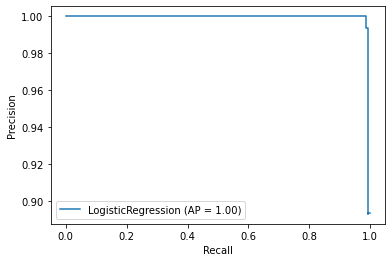

In [28]:
# Precision-recall curves
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(m_lr, X_df, ytrain)

In [79]:
from sklearn.model_selection import cross_val_score, cross_validate

# cross_val_score(X_df, ytrain,cv=5)
cross_validation = cross_validate(LogisticRegression(C=0.1,class_weight='balanced'),
                              X_df, 
                              ytrain,
                              cv=10,
                              return_train_score=True)

# 
print('train_score, test_score:',cross_validation['train_score'].mean(), cross_validation['test_score'].mean())
print('m_lr.score:', m_lr.score(X_df, ytrain))

train_score, test_score: 0.9920632385819227 0.8482323232323232
m_lr.score: 0.9910714285714286


In [81]:
# prediction
Xtest_t = cv.transform(Xtest['lyrics'])
Xtest_t

<113x35566 sparse matrix of type '<class 'numpy.float64'>'
	with 11119 stored elements in Compressed Sparse Row format>

In [80]:
m_lr.score(Xtest_t,ytest)

0.8938053097345132

In [44]:
ypred = m_lr.predict_proba(Xtest_t)
print(m_lr)
pd.DataFrame(ypred)

LogisticRegression(C=0.01, class_weight='balanced')


,0,1
0,0.500172,0.499828
1,0.498749,0.501251
2,0.500898,0.499102
3,0.504719,0.495281
4,0.501239,0.498761
...,...,...
108,0.499078,0.500922
109,0.499226,0.500774
110,0.500357,0.499643
111,0.501934,0.498066


In [48]:
m_lr.predict(Xtest_t), ytest

(array(['MJ', 'Taylor-Swift', 'MJ', 'MJ', 'MJ', 'MJ', 'MJ', 'MJ',
        'Taylor-Swift', 'MJ', 'MJ', 'MJ', 'Taylor-Swift', 'MJ',
        'Taylor-Swift', 'Taylor-Swift', 'MJ', 'MJ', 'Taylor-Swift',
        'Taylor-Swift', 'MJ', 'MJ', 'MJ', 'Taylor-Swift', 'Taylor-Swift',
        'MJ', 'MJ', 'Taylor-Swift', 'MJ', 'MJ', 'MJ', 'MJ', 'Taylor-Swift',
        'Taylor-Swift', 'MJ', 'MJ', 'Taylor-Swift', 'Taylor-Swift', 'MJ',
        'MJ', 'MJ', 'MJ', 'Taylor-Swift', 'MJ', 'MJ', 'Taylor-Swift', 'MJ',
        'Taylor-Swift', 'MJ', 'MJ', 'MJ', 'Taylor-Swift', 'Taylor-Swift',
        'MJ', 'MJ', 'MJ', 'MJ', 'Taylor-Swift', 'MJ', 'Taylor-Swift', 'MJ',
        'Taylor-Swift', 'MJ', 'MJ', 'Taylor-Swift', 'MJ', 'Taylor-Swift',
        'MJ', 'Taylor-Swift', 'MJ', 'Taylor-Swift', 'Taylor-Swift', 'MJ',
        'MJ', 'MJ', 'Taylor-Swift', 'MJ', 'MJ', 'Taylor-Swift', 'MJ',
        'Taylor-Swift', 'Taylor-Swift', 'Taylor-Swift', 'MJ', 'MJ', 'MJ',
        'MJ', 'MJ', 'MJ', 'Taylor-Swift', 'MJ', 'MJ', 'MJ', 

In [62]:
# prediction with user input 1
import sys

def predict_artist(lyrics):
    """returns the probable name of the artist given some text"""
    probs = m_lr.predict_proba(lyrics)
    df1 = pd.DataFrame(probs)
    # score0 = df1.iloc[0,0]
    #if score0 > 0.50:
        #return  print('Taylor Swift','possibility is',score0)
    # else:
    return m_lr.predict(lyrics)

# prediction with user input
user = input()
user_t = cv.transform( [user] ) 
predict_artist(user_t)

picture to burn


array(['Taylor-Swift'], dtype=object)

In [64]:
# prediction with user input 2
user = input()
user_t = cv.transform( [user] ) 

print(m_lr.predict_proba(user_t))
print(m_lr.predict(user_t))

picture to burn
[[0.49996785 0.50003215]]
['Taylor-Swift']


In [697]:
m_lr.predict_proba(user_t)

array([[0.50027388, 0.49972612]])

In [698]:
m_lr.predict(user_t)

array(['MJ'], dtype=object)

In [192]:
# !pip install wordcloud

     |████████████████████████████████| 371 kB 2.0 MB/s eta 0:00:01


In [327]:
# word cloud -Tayler S.
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from os import path
import numpy as np
import random
             
def plt_word_cloud(filename,figpath):
    # Read the whole text
    with open(filename) as f:
         mytext = f.read()
    figpath_d = path.dirname(figpath)
    
    # read the mask / color image 
    # Choose a fig shape 
    alice_coloring = np.array(Image.open(path.join(figpath_d, 'alice_color.png')))
    # alice_coloring = np.array(Image.open(path.join(figpath_d, 'MJ.png')))
    
    # stopwords : set of strings or None
    stopwords = set(STOPWORDS)
    
    wordcloud = WordCloud(background_color="white", max_words=1000, mask=alice_coloring,
               stopwords=stopwords, max_font_size=120,collocations=50,
                margin=2,random_state=42).generate(mytext)
    
    # create coloring from image
    image_colors = ImageColorGenerator(alice_coloring)
    # Apply our color function
    # wordcloud.recolor(color_func=grey_color_func) 
   
    # display wordcloud figure
    plt.imshow(wordcloud, interpolation='bilinear')
    # hide X,Y axis
    plt.axis("off")
    plt.figure()
    
    #wordcloud.to_file('MJ_word_cloud.png')
    wordcloud.to_file('TS_wordcloud.png')


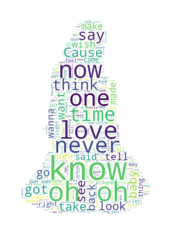

<Figure size 432x288 with 0 Axes>

In [281]:
filename = "lyrics_singer1.txt"
figpath = '/home/guo/spiced_projects/vanilla-vectors-student-code/week_04/'
plt_word_cloud(filename,figpath)

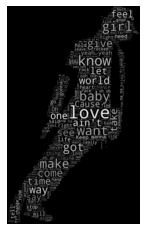

<Figure size 432x288 with 0 Axes>

In [285]:
filename2 = "lyrics_singer2.txt"
plt_word_cloud(filename2,figpath)

In [93]:
'''from pptx import Presentation
f = open(r"Presentation week4.pptx", "rb")
prs = Presentation(f)'''


In [94]:
# NaiveBayes model
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=1)
clf.fit(Xtest_t,ytest)
ypred = clf.predict_proba(Xtest_t)
pd.DataFrame(ypred)

,0,1
0,0.831341,0.168659
1,0.456413,0.543587
2,0.820927,0.179073
3,0.834113,0.165887
4,0.830937,0.169063
...,...,...
108,0.417592,0.582408
109,0.340811,0.659189
110,0.802891,0.197109
111,0.834556,0.165444


In [76]:
from sklearn.model_selection import cross_val_score, cross_validate

# cross_val_score(X_df, ytrain,cv=5)
cross_validation = cross_validate(clf,
                              X_df, 
                              ytrain,
                              cv=10,
                              return_train_score=True)

# 
print('train_score, test_score:',cross_validation['train_score'].mean(), cross_validation['test_score'].mean())
print('m_lr.score:', clf.score(X_df, ytrain))

train_score, test_score: 0.9069957988354668 0.6607070707070708
m_lr.score: 0.65625


In [77]:
user = input()
user_t = cv.transform( [user] ) 
clf.predict_proba(user_t)

print(clf.predict(user_t))

picture to burn
['MJ']


In [60]:
clf.score(Xtest_t,ytest)

0.9734513274336283

In [ ]:
# 2. constants
BEATLES_WORDS = ['submarine', 'yeah', 'love']
EMINEM_WORDS = ['detroit', 'gun', 'lose', 'yourself']

# 3. function definitions
def count_words(text, words1, words2):
    """counts words in two sample vocabularies"""
    a, b = 0, 0

    for word in text.lower().split():
        if word in words1:
            a += 1
        if word in words2:
            b += 1
    return a, b  # <-- tuple


def predict_artist(lyrics):
    """returns the probable name of the artist given some text"""
    b, e = count_words(lyrics, BEATLES_WORDS, EMINEM_WORDS)

    if b > e:
        return 'beatles'
    elif e > b:
        return 'eminem'
    else:
        return 'no idea'


# 4. main program
filename = sys.argv[1]

text = open(filename).read()
print(predict_artist(text))

0.0

In [296]:
# tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
X_df = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names(), index=labels)
X_df
vectorizer.get_feature_names()

['82',
 'above',
 'afternoon',
 'again',
 'against',
 'air',
 'all',
 'already',
 'alright',
 'am',
 'an',
 'and',
 'anymore',
 'are',
 'around',
 'as',
 'ashtray',
 'astray',
 'at',
 'awake',
 'awakes',
 'away',
 'back',
 'band',
 'basement',
 'batteries',
 'be',
 'beer',
 'begging',
 'believers',
 'below',
 'bend',
 'better',
 'bite',
 'box',
 'break',
 'bright',
 'brighter',
 'bring',
 'broken',
 'build',
 'burns',
 'but',
 'call',
 'calls',
 'can',
 'car',
 'caught',
 'cause',
 'chances',
 'chase',
 'cheapest',
 'claim',
 'cliffs',
 'climb',
 'closed',
 'clouded',
 'clouds',
 'cold',
 'come',
 'coming',
 'concrete',
 'consider',
 'control',
 'could',
 'courage',
 'danger',
 'dark',
 'darkened',
 'darkness',
 'dawn',
 'day',
 'days',
 'dead',
 'deep',
 'did',
 'disaffection',
 'dissolves',
 'distant',
 'dive',
 'do',
 'don',
 'door',
 'doubt',
 'down',
 'drag',
 'dream',
 'driving',
 'drowning',
 'easier',
 'eats',
 'ends',
 'even',
 'eyes',
 'face',
 'fade',
 'fades',
 'fading',
 '

In [ ]:
print(operator.itemgetter(*np.argsort(model.coef_[0]))(vectorizer.get_feature_names())[-20:])

print(operator.itemgetter(*np.argsort(model.coef_[0]))(vectorizer.get_feature_names())[:20])

Merge finished


In [188]:
# print(parsed_html.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <title>
   Michael Jackson Lyrics
  </title>
  <meta content="Michael Jackson Lyrics - All the great songs and their lyrics from Michael Jackson on Lyrics.com" name="description"/>
  <meta content="Michael Jackson lyrics, Michael Jackson song lyrics, Michael Jackson lyric" name="keywords"/>
  <meta content="width=device-width" name="viewport"/>
  <base href="https://www.lyrics.com/"/>
  <script>
   s4Prefix='https://static.stands4.com';version='1.3.10';
  </script>
  <!-- Bootstrap compiled and minified CSS -->
  <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.2/css

In [62]:
for k in parsed_html.find_all('a'):  
     print(k['href'])#查a标签的href值

login.php
https://www.abbreviations.com/
https://www.anagrams.net/
https://www.biographies.net/
https://www.calculators.net/
https://www.convert.net/
https://www.definitions.net/
https://www.grammar.com/
https://www.literature.com/
https://www.lyrics.com/
https://www.phrases.com/
https://www.poetry.com/
https://www.quotes.net/
https://www.references.net/
https://www.rhymes.net/
https://www.scripts.com/
https://www.symbols.com/
https://www.synonyms.com/
https://www.uszip.com/
/artists/0
/artists/A
/artists/B
/artists/C
/artists/D
/artists/E
/artists/F
/artists/G
/artists/H
/artists/I
/artists/J
/artists/K
/artists/L
/artists/M
/artists/N
/artists/O
/artists/P
/artists/Q
/artists/R
/artists/S
/artists/T
/artists/U
/artists/V
/artists/W
/artists/X
/artists/Y
/artists/Z
/justadded
random.php
artist/Michael-Jackson/4576
artist/Michael-Jackson/4576
artist/Michael-Jackson/4576
addbio.php?aid=4576
https://www.biographies.net/people/en/michael_jackson
javascript:void(0);
javascript:void(0);
art

KeyError: 'href'

In [22]:
os.getcwd()

'/home/guo/spiced_projects/vanilla-vectors-student-code/week_04'

In [246]:
import re
import requests
import nltk
from bs4 import BeautifulSoup

url = 'http://www.lyrics.com/eminem'
r = requests.get(url)
soup = BeautifulSoup(r.content)

In [247]:
gdata = soup.find_all('div',{'class':'row'})
gdata

[<div class="row">
 <div class="col-sm-8 col-sm-push-4" id="content-main">
 <div class="siteprop clearfix">
 <hgroup>
 <h1>Welcome to Lyrics<span style="color: #222;">.</span>com</h1>
 </hgroup>
 <div class="siteprop-int clearfix">
 <div>
 <p><strong>Lyrics.com</strong> is a huge collection of song lyrics, album information and featured video clips for a seemingly endless array of artists — collaboratively assembled by our large music community and <strong><a href="https://www.lyrics.com/editors.php">contributing editors</a></strong>.</p>
 </div>
 <div class="bottom">
 <p>Browse our lyrics and artists database <strong><a href="https://www.lyrics.com/artists/A">alphabetically</a></strong> or use our advanced query capabilites to search by <strong><a href="https://www.lyrics.com/lyrics/big%20in%20japan">keywords</a></strong>. You can follow your favorite artists, discuss and rate existing work, and translate pieces to almost any language.</p>
 </div>
 </div>
 <span class="flr">
 <button 

In [248]:
eminemLyrics = []

In [249]:
for item in gdata:
    title = item.find_all('td',{'class':'tal qx'})[0].text
    lyricsdotcom = 'http://www.lyrics.com'
    for link in item('a'):
        try:
            lyriclink = lyricsdotcom+link.get('href')
            req = requests.get(lyriclink)
            lyricsoup = BeautifulSoup(req.content)
            lyricdata = lyricsoup.find_all('div',{'id':re.compile('lyric_space|lyrics')})[0].text
            eminemLyrics.append([title,lyricdata])
            print('title')
            print('lyricdata')
            print('\n')
        except:
            pass

IndexError: list index out of range

In [55]:
# print(parsed_html.prettify())

In [142]:
# Find all h3 tags
parsed_html.find_all('a', attrs={'class': 'tal qx'})[0].text

IndexError: list index out of range

In [50]:
# Find the body of the html document
for entry in parsed_html.find_all('href')[1:].text:
    print(entry.text)
    print('\n')

AttributeError: 'list' object has no attribute 'text'

In [45]:
# Find all h3 tags
parsed_html.get('href').text

AttributeError: 'NoneType' object has no attribute 'text'

# Extract the curriculum from https://spiced.academy/de/program/data-science

In [135]:
# Request the page
spiced_response = requests.get('https://spiced.academy/de/program/data-science')
spiced_response.status_code

200

In [136]:
# Turn this into a BeautifulSoup object
parsed_spiced_html = BeautifulSoup(spiced_response.text)

In [137]:
#print(parsed_spiced_html.prettify())

In [138]:
# Find all h3 tags
parsed_spiced_html.find_all('h3', attrs={'class': 'mob-hidden'})[1].text

# returns a bs4.ResultSet; it behaves like a list

'Werde fließend im Umgang mit Python zur Analyse, Sammlung und Visualisierung von Daten, mit Fokus auf leistungsstarke Bibliotheken wie Pandas & NumPy.'

In [15]:
for entry in parsed_spiced_html.find_all('h3', attrs={'class': 'mob-hidden'})[1:]:
    print(entry.text)
    print('\n')

Werde fließend im Umgang mit Python zur Analyse, Sammlung und Visualisierung von Daten, mit Fokus auf leistungsstarke Bibliotheken wie Pandas & NumPy.


Tauche ein in die Welt des überwachten und unüberwachten Lernens, mit Modulen und Frameworks, wie SciKit-Learn und Statsmodels.


Lern Daten in SQL-Datenbanken wie PostgreSQL zu organisieren, zu speichern und wieder abzurufen.


Stell deinen Code live auf externen Servern mit Docker und AWS bereit und baue dir ein Online-Dashboard.


Erlerne hochaktuelle Engineering-Skills, um größere Python-Anwendungen zu schreiben, zu testen und zu deployen.


Über den gesamten Kursverlauf hinweg verwendest Du Git und GitHub zur Versionskontrolle Deines Codes und für die Arbeit im Team.




In [16]:
# You can walk down the hierarchies with beautiful soup
parsed_spiced_html.find('body').div.a

<a href="/">
<img alt="Spiced logo" class="header-logo" src="/img/Spiced_Logo_Dark.svg"/>
</a>

In [ ]:
import requests

In [17]:
r = requests.get('http://spiced-academy.com/')

print(r.status_code)
print(r.text[:184])

200
<!DOCTYPE html>
<html lang="en" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#" dir="ltr">

<head>
    <title>Your new career starts here | Spiced Academy</title>
    <meta na


In [202]:
# URL parameters
# url = "http://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi"
url = "http://spiced-academy.com/"
param_dict = {'db':'pubmed', 'term':'escherichia', 'rettype':'uilist'}

r = requests.get(url, params=param_dict)
print(r.text)

<!DOCTYPE html>
<html lang="en" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#" dir="ltr">

<head>
    <title>Your new career starts here | Spiced Academy</title>
    <meta name="description" content="Kickstart your new career with our intensive, on-site tech programs in Web Development and Data Science.">
    
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <link href="https://fonts.googleapis.com/css?family=Poppins:300,400,600&display=swap" rel="stylesheet">
    <link href="https://fonts.googleapis.com/css?family=IBM+Plex+Mono:400,500&display=swap" rel="stylesheet">
    <link rel='stylesheet' href='/css/main.css'>
    <link rel="apple-touch-icon" sizes="180x180" href="/apple-touch-icon.png?v=3">
    <link rel="icon" type="image/png" sizes="32x32" href="/favicon-32x32.png?v=3">
    <link rel="icon" type="image/png" sizes="16x16" href="/favicon-16x16.png?v=3">
    <link rel="mask-icon" href="/safari-pinned-tab.svg" color

In [203]:
url = "http://spiced-academy.com/"

# Disguising as a browser
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
page = requests.get(url, headers=headers)
print(page.status_code)

200




帽儿山，位于东林山脉中，山下有一个村子，民风淳朴，以耕田为生，与世隔绝。

清晨，村庄的大门前，整个村子里的乡亲，正为一个十五六岁少年送别，这少年瘦弱，但却白白净净，看起来很是乖巧，衣着尽管是寻常的青衫，可却洗的泛白，穿在这少年的身上，与他目中的纯净搭配在一起，透出一股子灵动。

他叫白小纯。

“父老乡亲们，我要去修仙了，可我舍不得你们啊。”少年满脸不舍，原本就乖巧的样子，此刻看起来更为纯朴。

四周的乡亲，面面相觑，顿时摆出难舍之色。

“小纯，你爹娘走的早，你是个……好孩子！！难道你不想长生了么，成为仙人就可以长生，能活的很久很久，走吧，雏鹰长大，总有飞出去的那一天。”人群内走出一个头发花白的老者，说道好孩子三个字时，他顿了一下。

“在外面遇到任何事情，都要坚持下去，走出村子，就不要回来，因为你的路在前方！”老人神色慈祥，拍了拍少年的肩膀。

“长生……”白小纯身体一震，目中慢慢坚定起来，在老者以及四周乡亲鼓励的目光下，他重重的点了点头，深深的看了一眼四周的乡亲，转身迈着大步，渐渐走出了村子。

眼看少年的身影远去，村中的众人，一个个都激动起来，目中的难舍刹那就被喜悦代替，那之前满脸慈祥的老者，此刻也在颤抖，眼中流下泪水。

“苍天有眼，这白鼠狼，他终于……终于走了，是谁告诉他在附近看到仙人的，你为村子立下了大功！”

“这白鼠狼终于肯离开了，可怜我家的几只鸡，就因为这白鼠狼怕鸡打鸣，不知用了什么方法，唆使一群孩子吃鸡肉，把全村的鸡都给吃的干干净净……”

“今天过年了！”欢呼之声，立刻在这不大的村子里，沸腾而起，甚至有人拿出了锣鼓，高兴的敲打起来。

村子外，白小纯还没等走远，他就听到了身后村子内，传出了敲锣打鼓的声音，还夹着欢呼。

白小纯脚步一顿，神色有些古怪，干咳一声，伴随着耳边传来的锣鼓，白小纯顺着山路，走上了帽儿山。

这帽儿山虽不高，却灌木杂多，虽是清晨，可看起来也是黑压压一片，很是安静。

“听二狗说，他前几天在这里被一头野猪追赶时，看到天上有仙人飞过……”白小纯走在山路上，心脏怦怦跳动时，忽然一旁的灌林中传来阵阵哗哗声，似野猪一样，这声音来的突然，让本就紧张的白小纯，顿时背后发凉。

“谁，谁在那里！”白小纯右手快速从行囊中拿出四把斧头，六把柴刀，还觉得不放心，又从怀里取出了一小根黑色的香，死死的抓住。

“别出来，千万别出来，我有斧头

中文


《一年永恒》开始下载：


KeyboardInterrupt: 